### Q.1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
### a) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
### b) Now Find the number of posts these handles have done in the previous 3 days.
### c) Depict this information using a suitable graph.

In [2]:
## IMPORTING ALL THE NEEDED LIBRARIES FOR THIS PROJECT
import selenium
from selenium import webdriver
import time
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException ## for wait function
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## initialise driver session.
driver=webdriver.Chrome(executable_path ='C:\\Users\HP\Desktop\chromedriver')

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\827197419.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(executable_path ='C:\\Users\HP\Desktop\chromedriver')


In [ ]:
## login to instagram handle.
def login():
    driver.get('https://www.instagram.com/')
    driver.maximize_window()
    time.sleep(5)
    driver.find_element(by=By.XPATH,value='//div/div/label/input[@type="text"]').send_keys("username")
    driver.find_element(by=By.XPATH,value='//div/div/label/input[@type="password"]').send_keys("password")
    driver.find_element(by=By.XPATH,value='//button/div[text()="Log In"]').click()
    time.sleep(5)
    try:
        popup =driver.find_element(by=By.XPATH,value='//div/button[text()="Not Now"]')
        if popup.is_enabled:
            popup.click()
        popup =driver.find_element(by=By.XPATH,value='//div/button[text()="Not Now"]')
        if popup.is_enabled:
            popup.click()
    except NoSuchElementException:
        pass
login()

time.sleep(5)

In [ ]:
## FUNCTION TO SEND KEYWORDS TO TEXT BOX
def send(key):
    driver.find_element(by=By.XPATH,value='//div/div/div/div/input[@type="text"]').send_keys("a")
    time.sleep(3)
    driver.find_element(by=By.XPATH,value='//div/div/div/div/input[@type="text"]').clear()
    time.sleep(3)
    driver.find_element(by=By.XPATH,value='//div/div/div/div/input[@type="text"]').send_keys(key)
    time.sleep(5)

In [ ]:
## to open a profile.
def openprofile(key):
    send(key)
    time.sleep(5)
    driver.find_element(by=By.XPATH,value='//div[contains(@role,"none")]').click()


time.sleep(5)

In [ ]:
names=[]
followers=[] ##to hold the name and followers count of first 10 peoples in food
def food():
    send("food")
    name=driver.find_elements(by=By.XPATH,value='//div/a/div//div/div/div/div/div[contains(@class,"_aacl _aaco _aacw _aacx _aad6")]')
    for i in name[:10]:
        names.append(i.text)
    for i in names:
        openprofile(i)
        time.sleep(4)
        followers.append(str(driver.find_element(by=By.XPATH,value='//ul//li/a/div/span[@class="_ac2a"]').text))
        driver.back()
        time.sleep(4)

food()
time.sleep(10)
for i in range(len(followers)):
    if 'K' in followers[i]:    
        followers[i]=float(followers[i][:-1])*1000
    else:
        followers[i]=float(followers[i][:-1])*1000000
followers=np.array(followers,dtype='int')
np.argsort(followers)[::-1]
users=np.array(names)
for i in users[np.argsort(followers)][::-1][:5]:
    print(i)

In [ ]:
## 5 id's with heighest number of followers
foodnetwork
foodsbible
foodgod
food52
foodinsider

In [ ]:
## number of posts done by above id's in past 3 days.


##since instagram loads data only by scrolling the screen,this set can be used to hold unique web elements generated 
## so that we can click on them and collect data efficiently.
s=OrderedSet()
for i in users[np.argsort(followers)][::-1][:5]:
    time.sleep(4)
    ## hold count of posts done in past 3 days of each profile.
    count=0
    flag=0
    openprofile(i)
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aabd _aa8k _aanf")]')))
    time.sleep(3)
    try:
        ##this loop helps to load new datas if needed
        while True:
            res=driver.find_elements(by=By.XPATH,value='//div[contains(@class,"_aabd _aa8k _aanf")]')
            for j in res:
                if j not in s:
                    j.click()
                    time.sleep(3)
                    date=driver.find_element(by=By.XPATH,value='//div/div/div/a/div/time[@class="_aaqe"]').text
                    time.sleep(2)
                    if("HOUR" in date.upper()):
                        count=count+1
                    elif("DAY" in date.upper() and int(date[:2]) <=3):
                        count=count+1
                    elif("MINUTE" in date.upper()):
                        count=count+1
                    elif("SECOND" in date.upper()):
                        count=count+1
                    else:
                        flag=1
                        break
                    driver.find_element(by=By.XPATH,value='//div[contains(@class,"o9tjht9c jar9mtx6 mbzxb4f5 njoytozt")]').click()
                    time.sleep(4)
            if(flag==1):
                break
            for j in res:
                s.add(j)
            ##to scroll the screen to last data in res so that we can collect some new data in next iteration.
            driver.execute_script("arguments[0].scrollIntoView();", res[-1])
            time.sleep(4)
        driver.back() 
    except:
        pass
    print(i,count)

In [ ]:
foodnetwork 49
foodsbible 8
foodgod 2
food52 0
foodinsider 4

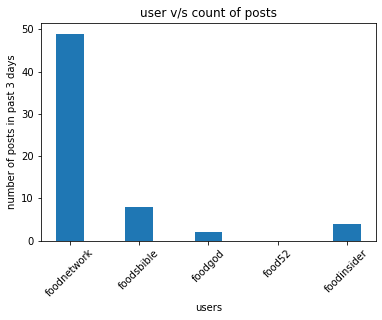

In [1]:
## graph betweeen user name and number of posts in past 3 days.
x=["foodnetwork","foodsbible","foodgod","food52","foodinsider"]
y=[49,8,2,0,4]
plt.bar(x,y,width=0.4)
plt.xticks(rotation=45)
plt.xlabel("users")
plt.ylabel("number of posts in past 3 days")
plt.title("user v/s count of posts")
plt.show()

### Q.2) Your friend also needs a list of hashtags that he should use in his posts.
### 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [ ]:
dic={}
x=["foodnetwork","foodsbible","foodgod","food52","foodinsider"]
for i in range(5):
    openprofile(x[i])
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aabd _aa8k _aanf")]')))
    res=driver.find_elements(by=By.XPATH,value='//div[contains(@class,"_aabd _aa8k _aanf")]')[:10]
    time.sleep(5)
    for j in res:
        try:
            j.click()
        except:
            openprofile(x[i])
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aabd _aa8k _aanf")]')))
            res=driver.find_elements(by=By.XPATH,value='//div[contains(@class,"_aabd _aa8k _aanf")]')[:10]
            continue
        time.sleep(5)
        print(driver.find_element(by=By.XPATH,value='//li/div/div//div//div/span[contains(@class,"_aacl _aaco _aacu _aacx _aad7 _aade")]').text)
        print("-------------------------------------------------------------------------------------------------------------")
        time.sleep(5)
        oppo=driver.find_elements(by=By.XPATH,value='//li[@class="_a9zj _a9zl  _a9z5"]/div[@class="_a9zm"]/div//div//div/span[contains(@class,"_aacl _aaco _aacu _aacx _aad7 _aade")]/a')
        for p in oppo:
            dic[p.text]=dic.get(p.text,0)+1
        driver.find_element(by=By.XPATH,value='//div[contains(@class,"o9tjht9c jar9mtx6 mbzxb4f5 njoytozt")]').click()
        time.sleep(5)
    driver.back()
    time.sleep(5)

In [ ]:

One beautiful swirl 💛💖💚
🎥: @thelavendercookiejar
-------------------------------------------------------------------------------------------------------------

This sweet carrot pudding is a treat @maneetchauhan would look forward to most when she was growing up! 🥕🥕⁠
⁠
Get the recipe for Gajar Ka Halwa with the link in our bio.
-------------------------------------------------------------------------------------------------------------

Opening a restaurant is stressful enough, but what happens when your business partner is also your romantic partner?

#MeOrTheMenu premieres Thursday, June 30 at 10|9c. Stream it the same day on @discoveryplus. #discoveryplus
-------------------------------------------------------------------------------------------------------------

@guyfieri's beef short ribs become SO tender in the pressure cooker before being finished on the grill with red wine barbecue glaze 🤤

Subscribe to @discoveryplus to stream more episodes of #GuysBigBite. #discoveryplus

Search for "Grilled BBQ Short Ribs" on FoodNetwork.com to get the recipe!
-------------------------------------------------------------------------------------------------------------

@tylerflorence adds a spicy kick to creamy crab that's served atop perfectly roasted filet mignons 🤤

#GreatFoodTruckRace is all-new Sunday at 9|8c. Stream it the same day on @discoveryplus. #discoveryplus

Search for "Roasted Tenderloin of Beef with Spicy Crab Salad" on FoodNetwork.com to get the recipe!
-------------------------------------------------------------------------------------------------------------

Soft herbs like cilantro and parsley should be added at the *end* of the cooking process, while hard, sturdy herbs like rosemary and thyme can go in at the beginning! 🪴

#SymonDinners with @chefsymon > Saturday @ 12|11c
-------------------------------------------------------------------------------------------------------------

Celebrate Juneteenth with these recipes on FoodNetwork.com! ✨

〰️ @foodieinnewyork's Strawberry Punch
〰️ @carlaphall's Fried Catfish Fingers
〰️ @theequeenofflavor's Juneteenth Macarons
〰️ @carlaphall's Summer Butter Bean Salad with Hot Sauce Vinaigrette
〰️ @chefeddiejackson's Cajun Lemon Pepper Chicken Wings
〰️ @theequeenofflavor's Raspberry Fritters
〰️ @chefjj's Hot Links
〰️ @ms.nikki_scott's Strawberry Cobbler
〰️ @chefjeromegrant's Crispy Fried Red Fish and Spicy Remoulade
〰️ @chefjj's Summer Succotash
-------------------------------------------------------------------------------------------------------------

A Cheesy Chicken Dinner from @giadadelaurentiis 🎉 One fan said this recipe is a "definite keeper!" 🙌🙌

Subscribe to @discoveryplus to stream full episodes of #GiadaAtHome. #discoveryplus

Search for the recipe for "Easy Chicken Cordon Bleu" on FoodNetwork.com!
-------------------------------------------------------------------------------------------------------------

ICYMI: Learn how to filet a fish (the easy way!) with @chefanneburrell's go-to technique 🔪

#BBQBrawl > Mondays @ 9|8c
-------------------------------------------------------------------------------------------------------------

Campanelle is our current favorite pasta shape 💚 Craving this creamy mushroom pasta from @rubirosa_nyc today and everyday! #FoodNetworkFinds
-------------------------------------------------------------------------------------------------------------

Dry Aged Bologna 😳
(📷: @maxthemeatguy)
-------------------------------------------------------------------------------------------------------------

Perfect Party Snack 🥓😍 (📷: @cookingintheyard)
-------------------------------------------------------------------------------------------------------------

Greek Meatballs with Fries and Salad 🍖🍟🥗
(📷: @primal_gourmet)
-------------------------------------------------------------------------------------------------------------

Fajita Quesadillas 🌮😋
(📷: @nutrientmatters)
-------------------------------------------------------------------------------------------------------------

Mozzarella Pull Apart Bread 😍
(📷: @milayinka)
-------------------------------------------------------------------------------------------------------------

Birria + Ramen = 🔥 (📍: @birrialossocios)
-------------------------------------------------------------------------------------------------------------

Prosciutto + Turkey + Garlic Confit Cream Cheese Sandwich 🥪
(📷: @the_sweetnsalty)
-------------------------------------------------------------------------------------------------------------

Hungarian "Lecsó" Stew 🇭🇺😋
(📷: @menwiththepot)
-------------------------------------------------------------------------------------------------------------

Creamy Crunchy Bubble Potato Pillows 🥔
(📷: @ms_shi_mr_he)
-------------------------------------------------------------------------------------------------------------

Jake’s Perfect Sandwich 🥪😋
(📷: @albert_cancook)
-------------------------------------------------------------------------------------------------------------

When you’re at the movies are you a popcorn or Nachos person? Idk about you but I LOVE popcorn and especially this Sour Patch Kids & Nutter Butter MASH UP MIX!! @cookiepop_candypop
-------------------------------------------------------------------------------------------------------------

Get your umbrellas 🌂.. big storm coming

📹 luckyjiayou1212/douyin
-------------------------------------------------------------------------------------------------------------

NO ITS NOT A BURGER

📹 @sadfman
-------------------------------------------------------------------------------------------------------------

When the schlag whipped cream is the dessert!!!

📹 tdxmy/douyin
-------------------------------------------------------------------------------------------------------------

Multi sensory restaurants are the future… it’s like eating in 4D
-------------------------------------------------------------------------------------------------------------

🗣 guest alert 🗣 @foodgod made his first @snackpass order. . .
-------------------------------------------------------------------------------------------------------------

Let’s Go Moments at LAX with @Hertz with a poutine surprise…what food trucks do you love? #HertzLetsGo #ad
-------------------------------------------------------------------------------------------------------------

When Easter and Bday are on the same Day this is the Cake…happy bday @kamal ..guess what’s inside?? Was his wish to burn 🔥 the place down? 😂
-------------------------------------------------------------------------------------------------------------

The most over the top Diamond bow tie by @jacobandco for tonights wedding!..I got security don’t try it! Lol
-------------------------------------------------------------------------------------------------------------

All I have to say is the new season of #kardashians on @hulu is a BLOCKBUSTER… WOW!! Exciting, fast paced..and super Glam! Congrats to everyone involved!
-------------------------------------------------------------------------------------------------------------

Ladies and gentleman...@carolinagelen's Éclair Cake! Run, don't walk, to the link in bio for the recipe. #f52community

There are regular potatoes, and then there are 15-hour potatoes. 🥔 Hear us out: this recipe, posted initially by @poppy_cooks, went viral on TikTok and has wowed potato lovers everywhere. So naturally, we had to test it ourselves, so we turned to @jun.and.tonic, who tested this viral method. Get all the details at the link in bio! #f52community
-------------------------------------------------------------------------------------------------------------

Today, @dominiqueevanz is taking us through @lollipopsiclepdx's Spanakopita Grilled Cheese (aka all of the cheesy, garlic-y greens of spanakopita without the phyllo dough). It's just the recipe to take your grilled cheese to the next level—make it at the link in bio! #f52community
-------------------------------------------------------------------------------------------------------------

POV: you're about to indulge in a cookie with so many chocolate pools from @thaliaho. 📸: @thaliaho #f52community #f52grams
-------------------------------------------------------------------------------------------------------------

We're celebrating Juneteenth all weekend long! We’ll be joining @eattheculture to shine a spotlight on Black food bloggers sharing recipes inspired by their favorite Black American cookbooks participating in the #JuneteenthCookout2022 (for the fifth year!) started by @meikoandthedish and @thehungryhutch. Today we are featuring a Very Strawberry Shortcake from @meikoandthedish, Soy Lime Beef Stir Fry from @coinedcuisine, Blackberry Peach Crumble Pie from @moniquepolanco_, African Soul Rice Salad With Crispy Collards from @savorandsage, and a Grape-Tarragon Spritzer from @senseandedibility! For all of these recipes and more information about the significance of Juneteenth, head to the link in bio. #f52community
-------------------------------------------------------------------------------------------------------------

Flats or drums?! On this episode of The Secret Sauce with @grossypelosi, food stylist and recipe developer @chefwillcoleman joins Dan to make slightly sweet, spicy, puckery, and umami-filled bites of heaven AKA lemon pepper chicken wings! We'll cheers to that! Watch the episode and find the full recipe at the link in bio. #f52community
-------------------------------------------------------------------------------------------------------------

These Veggie & Fruit To-Go Cups are here to make sure your produce never goes wilty again! Here’s how it works: the double-layer lets you rinse fruit in the mini colander, then pop it right into the cup, where it can drain while you run out. Make it yours at the link in bio or tap to shop. 📸: @rockyluten #f52community
-------------------------------------------------------------------------------------------------------------

@snarkybutdelish’s take on @kalememaybe’s Charred Mini Sweet Peppers with Burrata and Chimichurri is a 10/10! Grab the full recipe over on @kalememaybe’s profile. 📸: @snarkybutdelish #f52community #f52grams
-------------------------------------------------------------------------------------------------------------

We know how much you all love @anna_s_table’s whipped feta dip with spicy honey, so we got @dominiqueevanz to walk us through how to make it. The result? A creamy dip that is welcomed at any summer gathering! Grab the full recipe deets at the link in bio. #f52community
-------------------------------------------------------------------------------------------------------------

This light, brothy weeknight pasta will immediately transport you seaside! The brothy tomato sauce, white fish, shallots, and sizzled capers combined with the paccheri pasta noodles will become a summer staple. For the full recipe from @pastasocialclub, head the link in bio. 📸: @pastasocialclub #f52community
-------------------------------------------------------------------------------------------------------------

The color red is significant during Juneteenth celebrations, though there are a few theories as to why. "The one I hear frequently is that red symbolizes the blood shed by enslaved West African ancestors," culinary historian Adrian Miller told Insider. "So, red pays homage and respect to those ancestors who died during the Atlantic slave trade."

"Top Chef" and "The Great Soul Food Cook-Off" veteran Chris Scott is a veteran chef who recalls celebrating Juneteenth with his family as a child. We tried his family-friendly recipe for red velvet pancakes ahead of the holiday — check the link in our bio for the full recipe and to learn more about the historical importance of red food during Juneteenth celebrations.

Story by Lauren Edmonds.

(Credit: Lauren Edmonds/Insider, Courtesy of Chris Scott)

#juneteenth #pancakes #redvelvetcake #recipes #breakfast #dessert #redvelvetpancakes #redfood
-------------------------------------------------------------------------------------------------------------

Juneteenth first took place on June 19, 1865, when Union soldiers arrived in Galveston, Texas, and informed the enslaved African Americans they were free. 157 years later, African Americans across the country celebrate with potlucks, cookouts, family meals, and neighborhood gatherings that foster community.

We tried Tabitha Brown's BBQ jackfruit sandwiches ahead of Juneteenth to test their potential as an alternative, vegan-friendly cookout dish. Click the link in our bio for the full recipe — and to learn more about the history of Juneteenth.

Story by Lauren Edmonds.

(Credit: Lauren Edmonds/Insider)

#juneteenth #vegan #veganrecipes #bbq #cookout #pulledpork #jackfruit #tabithabrown
-------------------------------------------------------------------------------------------------------------

Russia's McDonald's restaurants have reopened with a new name, logo, and menu.
Vkusno & tochka, which translates as "tasty and that's it," opened 15 stores in and around Moscow on Sunday.

There aren't any Big Macs or McFlurrys on Vkusno & tochka's menu. Some former McDonald's items weren't immediately available because of logistical difficulties, and trade restrictions mean dishes will likely change, Oleg Paroev, CEO of Vkusno & tochka, said, per The Wall Street Journal.

For one, Coca-Cola's decision to suspend sales in Russia has left Vkusno & tochka seeking new soft-drink suppliers, Reuters reported.

Click the link in our bio for the full menu.

Story by Grace Dean.

(Credit: Getty Images/Vkusno & tochka)
-------------------------------------------------------------------------------------------------------------

I was a finalist on season 12 of “The Great British Bake Off,” also known as “The Great British Baking Show” in the US.

I had an incredible experience being on the baking-competition series, but it came with a few highs and lows.

The show’s crew is amazing and it’s truly a paradise for foodies like me. Sometimes though, I did struggle with watching bakers go home and imposter syndrome on set.

For more about my experience on the show, visit the link in our bio.

Story by @crystellepereira.

(Credit: Netflix)
#britishbakeoff #bakingcompetition #cooking #netflix
-------------------------------------------------------------------------------------------------------------

Popeyes is offering a throwback deal on its famous fried chicken, and that means customers can get two pieces for just 59 cents.

The fast food chain announced the special offer to mark its 50th anniversary.

In 1972, founder Alvin C. Copeland Sr. opened a restaurant in New Orleans called Chicken on the Run, selling traditional Southern-fried chicken.

The business struggled, so within a few months, he reopened the restaurant under the name Popeyes, after Popeye Doyle of the film "The French Connection," this time specializing in spicy, New Orleans-style chicken, according to the company website.

Popeyes took off. Back then, Popeyes sold two pieces of bone-in chicken for 59 cents. Now, the company is bringing back the deal for a week to commemorate the milestone.

To read the full story by Sarah Jackson, tap the link in our bio.

(Credit: Getty)
-------------------------------------------------------------------------------------------------------------

The iconic chili sauce with the rooster on its bottle might be missing from grocery shelves soon.

Huy Fong Foods Inc., the company that makes sriracha, has suspended production of the sauce, along with its chili garlic and sambal oelek sauces, because of a chili pepper shortage.

The company said it's experiencing a "severe shortage of chili" because of weather conditions where the chili peppers are grown. Huy Fong told Axios its chili peppers come from Mexico, which is currently in a drought.

"Unfortunately, this is out of our control and without this essential ingredient we are unable to produce any of our products (Chili Garlic, Sambal Oelek, and Sriracha Hot Chili Sauce)," the company wrote in the letter to customers.

Read the full story by Britney Nguyen by clicking the link in our bio.

(Credit: Huy Fong Foods Inc.)
-------------------------------------------------------------------------------------------------------------

Insider reporter Chelsea Davis compared three rotisserie chickens from Costco, Safeway, and Whole Foods.

The chicken from Whole Foods was dry and not juicy at all, so I wasn’t impressed with this one.

Safeway’s rotisserie chicken was my favorite because it was simply delicious and perfectly tender.

Story By: Chelsea Davis

(Credit: Chelsea Davis/Insider)
#rotisseriechicken #reviews #storebought
-------------------------------------------------------------------------------------------------------------

Get a taste of the French Riviera in Hollywood 🪩
-------------------------------------------------------------------------------------------------------------
hello
Building a layer cake takes time, from baking multiple layers to decorating the finished dessert, but there's no better way to ring in Pride than with a perfect rainbow cake. I tried these three different methods and ranked them based on how much work they took to bake and how visually attractive they turned out.

### Q.2)
### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [ ]:
#here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency 
##      of all the words in the content.


##the above dictioray 'dic' will give us the count of all hashtags present in the top 10 posts of the top5 foodchannels.
## as we are only intrested in  '#hashtags' with the help of loop i am avoiding the other symbols from dic 
word=[]
frequency=[]
for i in dic:
    if i[0]=='#':
        word.append(i)
        frequency.append(dic[i])
        print(i,dic[i])

In [ ]:
#MeOrTheMenu 1
#discoveryplus 4
#GuysBigBite 1
#GreatFoodTruckRace 1
#SymonDinners 1
#GiadaAtHome 1
#BBQBrawl 1
#FoodNetworkFinds 1
#HertzLetsGo 1
#ad 1
#kardashians 1
#f52community 10
#f52grams 2
#JuneteenthCookout2022 1
#juneteenth 2
#pancakes 1
#redvelvetcake 1
#recipes 1
#breakfast 1
#dessert 1
#redvelvetpancakes 1
#redfood 1
#vegan 1
#veganrecipes 1
#bbq 1
#cookout 1
#pulledpork 1
#jackfruit 1
#tabithabrown 1
#britishbakeoff 1
#bakingcompetition 1
#cooking 1
#netflix 1
#rotisseriechicken 1
#reviews 1
#storebought 1
#rainbow 1
#rainbowcake 1
#layercake 1
#baking 1
#pridemonth 1
#celebration 1
#foodcoloring 1
#frosting 1
#cakedecorating 1
#cakemix 1
#psychedelicwater 1
#sobercurious 1
#kava 1
#nonalcoholicdrink 1
#alcoholfree 1
#nonalcoholicseltzer 1
#kavaroot 1
#sober 1

### Q.2)
### 3.Create a csv file with two columns : the word and its frequency

In [ ]:
import pandas as pd
df=pd.DataFrame()
df['words']=np.array(word)
df['count']=np.array(frequency)
df.to_csv("Hashtag.csv")
##file will be saved in working directory.

### Q.2)
### 4.Now, find the hashtags that were most popular among these bloggers

In [ ]:
word=np.array(word)
frequency=np.array(frequency)
frequency=frequency[np.argsort(frequency)][::-1]
word=word[np.argsort(frequency)][::-1]
for i in range(word.size):
    print(word[i],frequency[i])

In [ ]:
#MeOrTheMenu 10
#discoveryplus 4
#GuysBigBite 2
#GreatFoodTruckRace 2
#f52grams 1
#bbq 1
#veganrecipes 1
#vegan 1
#redfood 1
#redvelvetpancakes 1
#dessert 1
#breakfast 1
#britishbakeoff 1
#redvelvetcake 1
#recipes 1
#kavaroot 1
#JuneteenthCookout2022 1
#tabithabrown 1
#f52community 1
#kardashians 1
#ad 1
#HertzLetsGo 1
#FoodNetworkFinds 1
#BBQBrawl 1
#GiadaAtHome 1
#pancakes 1
#juneteenth 1
#cookout 1
#pulledpork 1
#sober 1
#nonalcoholicseltzer 1
#alcoholfree 1
#nonalcoholicdrink 1
#kava 1
#sobercurious 1
#psychedelicwater 1
#cakemix 1
#cakedecorating 1
#frosting 1
#foodcoloring 1
#celebration 1
#pridemonth 1
#baking 1
#layercake 1
#rainbowcake 1
#rainbow 1
#storebought 1
#reviews 1
#rotisseriechicken 1
#netflix 1
#cooking 1
#bakingcompetition 1
#jackfruit 1
#SymonDinners 1

### Q.2)
### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

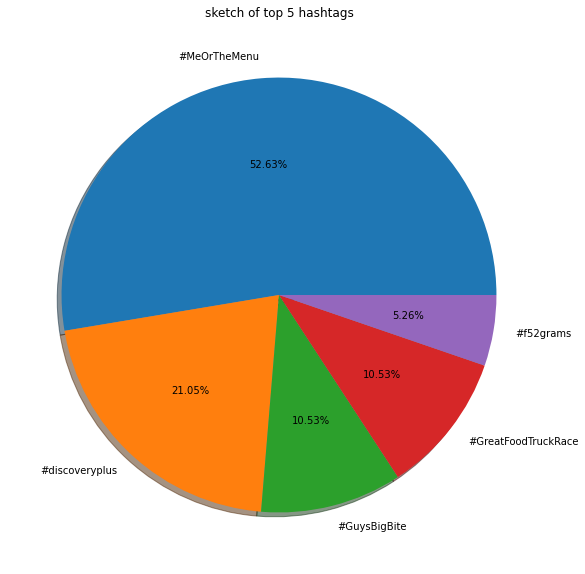

In [3]:
plt.figure(figsize=(10, 10))
plt.pie(frequency[:5],labels=word[:5],autopct="%.2f%%",shadow=True, labeldistance=1.1)
plt.title("sketch of top 5 hashtags")
plt.show()

### Q.3)You need to also calculate average followers : likes ratio for the obtained handles.
### Followers : Likes ratio is calculated as follows:
### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [ ]:
##find the likes for top 10 posts
dic={}
x=["foodnetwork","foodsbible","foodgod","food52","foodinsider"]
for i in range(5):
    likes=0
    openprofile(x[i])
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aabd _aa8k _aanf")]')))
    res=driver.find_elements(by=By.XPATH,value='//div[contains(@class,"_aabd _aa8k _aanf")]')[:10]
    time.sleep(5)
    for j in res:
        try:
            j.click()
        except:
            openprofile(x[i])
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aabd _aa8k _aanf")]')))
            res=driver.find_elements(by=By.XPATH,value='//div[contains(@class,"_aabd _aa8k _aanf")]')[:10]
            continue
        try:
            likes=likes+int(driver.find_element(by=By.XPATH,value='//section/div/div/div/a/div/span').text.replace(",",""))
        except:
            pass
        driver.find_element(by=By.XPATH,value='//div[contains(@class,"o9tjht9c jar9mtx6 mbzxb4f5 njoytozt")]').click()
        time.sleep(5)
    driver.back()
    time.sleep(5)
    dic[x[i]]=likes

In [ ]:
{'foodnetwork': 42624,
 'foodsbible': 1169035,
 'foodgod': 265139,
 'food52': 761700,
 'foodinsider': 79238}

### 2.Calculate the average likes for a handle.

In [ ]:
##average likes for a handle
ids=np.array([i for i in dic.keys()])
likes=np.array([i for i in dic.values()])
averagelikes=likes/10
averagelikes

In [ ]:
array([  4262.4, 116903.5,  26513.9,  76170. ,   7923.8])

### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [ ]:
usernames=np.array(users[np.argsort(followers)][::-1][:5])
countoffollowers=np.array(followers[np.argsort(followers)][::-1][:5])
countoffollowers/averagelikes

In [ ]:
array([2956.08108108,   58.16763399,  143.32105047,   45.94984902,
        290.26477195])

### 4.Create a bar graph to depict the above obtained information.

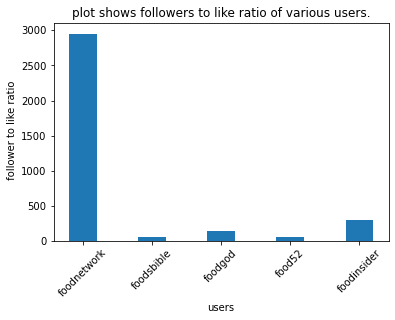

In [4]:
usernames=['foodnetwork', 'foodsbible', 'foodgod', 'food52', 'foodinsider']
ratio=[2956.08108108,   58.16763399,  143.32105047,   45.94984902,290.26477195]
plt.bar(usernames,ratio,width=0.4)
plt.xticks(rotation=45)
plt.xlabel("users")
plt.ylabel(" follower to like ratio")
plt.title("plot shows followers to like ratio of various users.")
plt.show()